In [1]:
#inspired from fastai's stable diffusion deep dive lecture:
# https://course.fast.ai/Lessons/lesson9.html

In [ ]:
import gc
gc.collect()

import os
from dotenv import load_dotenv

# Load the environment variables from the .env file
# Loads the HF_TOKEN into the environment, for accessing HuggingFace
load_dotenv()

# If your environment already has the HF_TOKEN key loaded, the above step can be ignored

In [2]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from diffusers import StableDiffusionPipeline
from fastcore.all import concat
from huggingface_hub import notebook_login
from PIL import Image

logging.disable(logging.WARNING)

torch.manual_seed(1)
if not (Path.home()/'.cache/huggingface'/'token').exists(): notebook_login()

In [3]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", variant="fp16", torch_dtype=torch.float16).to("mps")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
!ls ~/.cache/huggingface/hub

models--CompVis--stable-diffusion-v1-4
models--deepset--roberta-base-squad2
models--distilbert-base-uncased-finetuned-sst-2-english
models--facebook--detr-resnet-50
models--microsoft--markuplm-base
models--microsoft--markuplm-base-finetuned-websrc
models--timm--resnet50.a1_in1k
version.txt
version_diffusers_cache.txt


In [5]:
pipe.enable_attention_slicing()

In [6]:
prompt = "a photograph of an astronaut riding a horse"

  0%|          | 0/50 [00:00<?, ?it/s]

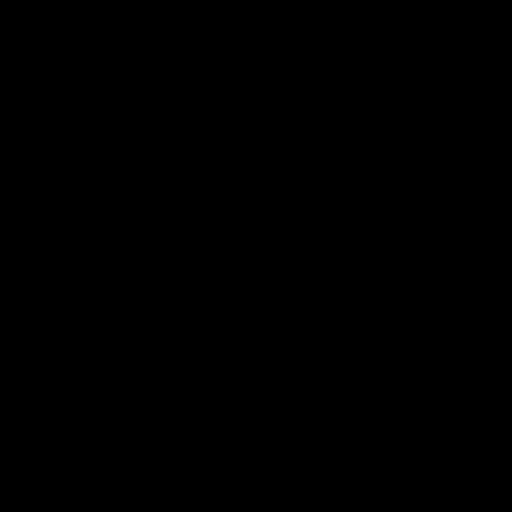

In [7]:
pipe(prompt).images[0]